In [1]:
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt


cspeed = 2.99792e10 #[cm/s]
au = 1.496e13 #[cm]
pc = 3.086e18 #[cm]
Mpc = 3.086e24 #[cm]

In [2]:
def deg_to_cMpc(l_deg, z):
    l_arcsec = l_deg * 3600.0
    l_p = l_arcsec * cosmo.angular_diameter_distance(z) / u.Mpc * 1e6 / Mpc * au
    l_c = l_p * ( 1 + z )
    return l_c


def cMpc_to_deg(l_c, z):
    l_p = l_c / ( 1 + z )
    l_arcsec = ( l_p * Mpc / au ) / ( cosmo.angular_diameter_distance(z) / u.Mpc * 1e6 )
    l_deg = l_arcsec / 3600.0
    return l_deg

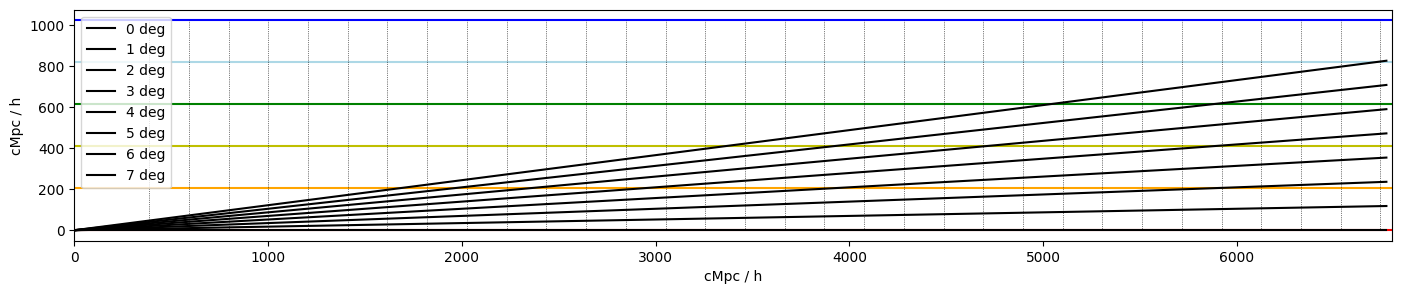

In [3]:

plt.figure(figsize=(17,3))

plt.ylabel("cMpc / h")
plt.xlabel("cMpc / h")

#xmax = 12
xmax = 6800
x0 = 0
plt.xlim([0,xmax])

boxsize = 205.0 #[cMpc/h]
for i, color in enumerate(["r", "orange", "y", "g", "lightblue", "b"]):
    plt.hlines(boxsize*i, 0, xmax, color=color)

cdis = 385.96
while cdis < xmax:
    plt.vlines(cdis, 0, boxsize*5, color="k", ls=":", lw=0.5)
    cdis += boxsize

z = np.array([ 0.1 * i for i in range(120) ])
D = cosmo.comoving_distance(z) / u.Mpc * 0.677 #[cMpc/h]
for theta in [0,1,2,3,4,5,6,7]:
    l_c = deg_to_cMpc(theta, z) * 0.677
    plt.plot(D, l_c+x0, label=f"{theta} deg", color="k")

plt.legend()

plt.show()

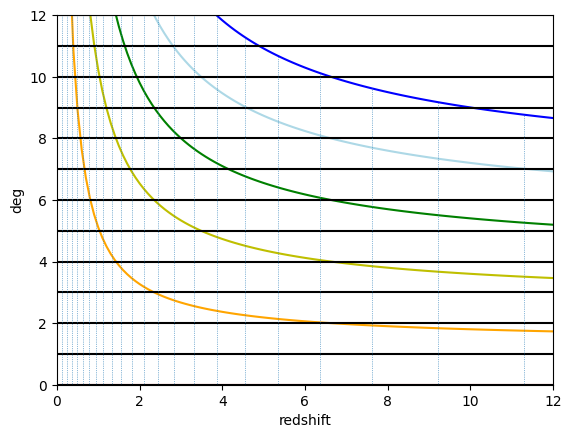

In [4]:
zs = np.array([ 0.1 * (i+1) for i in range(120) ])
D = cosmo.comoving_distance(zs) / u.Mpc #[Mpc]
D_L = cosmo.luminosity_distance(zs) / u.Mpc #[Mpc]
D_A = cosmo.angular_diameter_distance(zs) / u.Mpc #[Mpc]
H = cosmo.H(zs)

boxsize = 205.0 / 0.677 #[cMpc]
boxsize_deg = cMpc_to_deg(boxsize, zs)

tan_LoS = 0.1
tan_LoS = 0.0
size_LoS = D * tan_LoS 
size_LoS_deg = cMpc_to_deg(size_LoS, zs)

plt.figure()
plt.ylim([-6,6])
plt.ylim([0,12])
plt.xlim([0,12])
for i, color in enumerate(["r", "orange", "y", "g", "lightblue", "b"]):
    plt.plot(zs, boxsize_deg*i - size_LoS_deg, color=color)

for i in range(13):
    plt.hlines(i, 0, 12, color="k")


table = np.loadtxt("cdis_table.txt")
cdis_table = table[:,0]
ztable = table[:,1]

cdis0 = cdis_table[0]
dcdis = cdis_table[1] - cdis_table[0]
cdis = 385.96
while cdis < cdis_table[-1]:
    znow = ztable[int( ( cdis - cdis0 ) / dcdis )]
    
    boxsize_now_deg = ( boxsize / ( 1 + znow ) * Mpc / au ) / ( cosmo.angular_diameter_distance(znow) / u.Mpc * 1e6 ) / 3600.0
    size_LoS_deg = ( cosmo.comoving_distance(znow) / u.Mpc * tan_LoS / ( 1 + znow ) * Mpc / au ) / ( cosmo.angular_diameter_distance(znow) / u.Mpc * 1e6 ) / 3600.0
    plt.vlines(znow, - size_LoS_deg, boxsize_now_deg*5 - size_LoS_deg, ls=":", lw=0.5)
    cdis += boxsize

plt.ylabel("deg")
plt.xlabel("redshift")

plt.show()